In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor 
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_excel('Raweyedata.xlsx')


In [3]:
df.shape

(11485, 3)

In [4]:
df.isna().sum()

Recording timestamp      0
Gaze point X           542
Gaze point Y           542
dtype: int64

In [5]:
df = df.dropna()

In [6]:
df.head()

,Recording timestamp,Gaze point X,Gaze point Y
1,0,837.0,624.0
2,10,836.0,627.0
3,20,836.0,633.0
4,30,834.0,643.0
5,40,832.0,649.0


In [7]:
df.shape

(10943, 3)

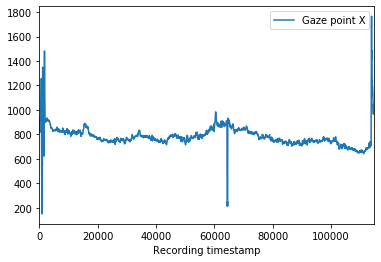

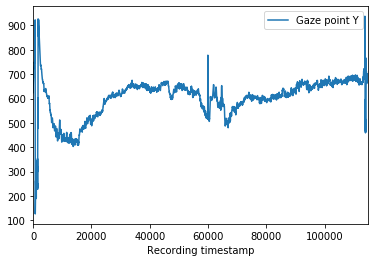

In [8]:
df.plot(x='Recording timestamp',y='Gaze point X')
df.plot(x='Recording timestamp',y='Gaze point Y')

In [9]:
X = df[['Recording timestamp']]
X

,Recording timestamp
1,0
2,10
3,20
4,30
5,40
...,...
11476,114731
11477,114741
11478,114751
11479,114761


In [10]:
y = df['Gaze point X']
y

1        837.0
2        836.0
3        836.0
4        834.0
5        832.0
         ...  
11476    997.0
11477    996.0
11478    994.0
11479    994.0
11480    994.0
Name: Gaze point X, Length: 10943, dtype: float64

In [11]:
X = df[['Recording timestamp']].values                          # Assign matrix X
y = df[['Gaze point X']].values  

In [12]:
X

array([[     0],
       [    10],
       [    20],
       ...,
       [114751],
       [114761],
       [114771]])

In [13]:
y

array([[837.],
       [836.],
       [836.],
       ...,
       [994.],
       [994.],
       [994.]])

In [14]:
print("X.Shape = ",X.shape)
print("y.Shape = ",y.shape)

X.Shape =  (10943, 1)
y.Shape =  (10943, 1)


In [15]:
tree = DecisionTreeRegressor(criterion='mse',max_depth=5)         
tree.fit(X, y)

DecisionTreeRegressor(max_depth=5)

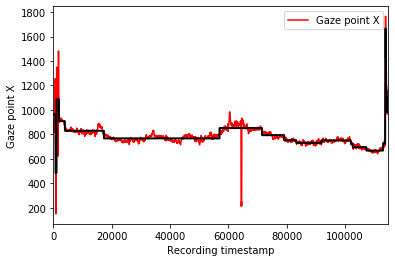

In [16]:
# plt.figure(figsize=(16, 8))
df.plot(x='Recording timestamp',y='Gaze point X',color='red')

plt.plot(X, tree.predict(X),color='black', lw=2)
plt.xlabel('Recording timestamp')
plt.ylabel('Gaze point X')
plt.show()

In [17]:
print("RMSE = ",mean_squared_error(y,tree.predict(X)))

RMSE =  1425.8878042842298


In [18]:
y = df[['Gaze point Y']].values  

In [19]:
tree = DecisionTreeRegressor(criterion='mse',max_depth=5)         
tree.fit(X, y)

DecisionTreeRegressor(max_depth=5)

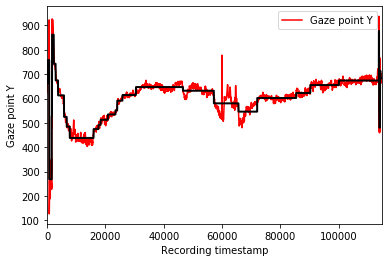

In [20]:
df.plot(x='Recording timestamp',y='Gaze point Y',color='red')

plt.plot(X, tree.predict(X),color='black', lw=2)
plt.xlabel('Recording timestamp')
plt.ylabel('Gaze point Y')
plt.show()

In [21]:
print("RMSE = ",mean_squared_error(y,tree.predict(X)))

RMSE =  310.8187884333941


In [23]:
pred=tree.predict(X)
pred.reshape(10943,1)
y.reshape(10943,1)
diff=pred-y
# diff.reshape(10943,1)